In [1]:
library(tidyverse)
library(colorRamps)
library(wesanderson)
library(plotly)
library(broom)
library(patchwork)
options(repr.plot.width=12, repr.plot.heigh=12)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




colormap

In [2]:
# colormap <- colorspace::diverge_hcl(12, c=100, l=c(50,90), power=1) 
my_palette <- wes_palette("Zissou1", 12, type = "continuous")

# Set default color and fill scales globally
update_geom_defaults("bar", list(fill = my_palette[1], color= "white"))
update_geom_defaults("col", list(fill = my_palette[2], color="white"))

# Optional: Set default discrete scale globally (use in your plots)
scale_fill_discrete <- function(...) scale_fill_manual(values = my_palette, ...)
scale_color_discrete <- function(...) scale_color_manual(values = my_palette, ...)

plot themes

In [3]:
ThemeMain<-theme( title =element_text(size=16, face='bold'),
                #  axis.text.y = element_blank(), 
                 axis.text.x = element_text(color='black'),
                #  axis.ticks.y = element_blank(),
                 axis.title.x = element_text(size=16,color='black',face='bold')
                 )


theme_set(theme_bw())
theme_set(ThemeMain)

## Data 

In [4]:
df <- read.csv('../../data/owid-energy-data.csv') %>% drop_na()


In [5]:
head(df)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,⋯,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bulgaria,2009,BGR,7634737,107365072896,200.106,0.041,8.078,0.062,1.310,⋯,0.000,0.005,94.656,0.320,0.662,31.435,0.24,86.696,0.567,0.327
2,Bulgaria,2010,BGR,7592271,109045211136,199.971,0.123,24.367,0.185,5.269,⋯,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
3,Bulgaria,2011,BGR,7543128,109435363328,5.558,0.010,25.889,0.195,7.954,⋯,0.200,0.124,26.377,0.484,2.375,114.011,0.86,314.918,1.721,1.058
4,Bulgaria,2012,BGR,7488347,110261510144,399.988,0.781,130.387,0.976,9.348,⋯,1.679,1.000,41.784,0.972,3.348,162.920,1.22,447.044,2.626,1.569
5,Bulgaria,2013,BGR,7431169,109643522048,29.912,0.292,170.692,1.268,14.803,⋯,3.231,1.915,12.500,0.396,3.743,184.359,1.37,503.742,3.185,1.890
6,Bulgaria,2014,BGR,7372142,110703534080,-0.613,-0.008,171.004,1.261,27.129,⋯,2.685,1.609,-3.126,-0.139,3.605,180.409,1.33,488.957,2.835,1.704


|variable                                     |class     |description                                  |
|:--------------------------------------------|:---------|:--------------------------------------------|
|country                                      |character |Geographic location                                     |
|year                                         |double    |Year of observation                                        |
|iso_code                                     |character |ISO 3166-1 alpha-3 three-letter country codes                                     |
|population                                   |double    |Population                                   |
|gdp                                          |double    |Total real gross domestic product, inflation-adjusted                                          |
|biofuel_cons_change_pct                      |double    |Annual percentage change in biofuel consumption                      |
|biofuel_cons_change_twh                      |double    |Annual change in biofuel consumption, measured in terawatt-hours                      |
|biofuel_cons_per_capita                      |double    |Per capita primary energy consumption from biofuels, measured in kilowatt-hours                      |
|biofuel_consumption                          |double    |Primary energy consumption from biofuels, measured in terawatt-hours                         |
|biofuel_elec_per_capita                      |double    |Per capita electricity generation from biofuels, measured in kilowatt-hours                      |
|biofuel_electricity                          |double    |Electricity generation from biofuels, measured in terawatt-hours                          |
|biofuel_share_elec                           |double    |Share of electricity generation that comes from biofuels                           |
|biofuel_share_energy                         |double    |Share of primary energy consumption that comes from biofuels                         |
|carbon_intensity_elec                        |double    |Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour                    |
|coal_cons_change_pct                         |double    |Annual percentage change in coal consumption                        |
|coal_cons_change_twh                         |double    |Annual change in coal consumption, measured in terawatt-hours                      |
|coal_cons_per_capita                         |double    |Per capita primary energy consumption from coal, measured in kilowatt-hours                      |
|coal_consumption                             |double    |Primary energy consumption from coal, measured in terawatt-hours                          |
|coal_elec_per_capita                         |double    |Per capita electricity generation from coal, measured in kilowatt-hours                      |
|coal_electricity                             |double    |Electricity generation from coal, measured in terawatt-hours                            |
|coal_prod_change_pct                         |double    |Annual percentage change in coal production                        |
|coal_prod_change_twh                         |double    |Annual change in coal production, measured in terawatt-hours                     |
|coal_prod_per_capita                         |double    |Per capita coal production, measured in kilowatt-hours                       |
|coal_production                              |double    |Coal production, measured in terawatt-hours                            |
|coal_share_elec                              |double    |Share of electricity generation that comes from coal                       |
|coal_share_energy                            |double    |hare of primary energy consumption that comes from coal                        |
|electricity_demand                           |double    |Electricity demand, measured in terawatt-hours                      |
|electricity_generation                       |double    |Electricity generation, measured in terawatt-hours                     |
|electricity_share_energy                     |double    |Electricity generation as a share of primary energy                  |
|energy_cons_change_pct                       |double    |Annual percentage change in primary energy consumption                |
|energy_cons_change_twh                       |double    |Annual change in primary energy consumption, measured in terawatt-hours                 |
|energy_per_capita                            |double    |Primary energy consumption per capita, measured in kilowatt-hours                      |
|energy_per_gdp                               |double    |Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$                            |
|fossil_cons_change_pct                       |double    |Annual percentage change in fossil fuel consumption                     |
|fossil_cons_change_twh                       |double    |Annual change in fossil fuel consumption, measured in terawatt-hours                     |
|fossil_elec_per_capita                       |double    |Per capita electricity generation from fossil fuels, measured in kilowatt-hours. This is the sum of electricity generated from coal, oil and gas.                       |
|fossil_electricity                           |double    |Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.                        |
|fossil_energy_per_capita                     |double    |Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.              |
|fossil_fuel_consumption                      |double    |Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.              |
|fossil_share_elec                            |double    |Share of electricity generation that comes from fossil fuels (coal, oil and gas combined)                       |
|fossil_share_energy                          |double    |Share of primary energy consumption that comes from fossil fuels                   |
|gas_cons_change_pct                          |double    |Annual percentage change in gas consumption                     |
|gas_cons_change_twh                          |double    |Annual change in gas consumption, measured in terawatt-hours                        |
|gas_consumption                              |double    |Primary energy consumption from gas, measured in terawatt-hours                       |
|gas_elec_per_capita                          |double    |Per capita electricity generation from gas, measured in kilowatt-hours                   |
|gas_electricity                              |double    |Electricity generation from gas, measured in terawatt-hours                     |
|gas_energy_per_capita                        |double    |Per capita primary energy consumption from gas, measured in kilowatt-hours                  |
|gas_prod_change_pct                          |double    |Annual percentage change in gas production                      |
|gas_prod_change_twh                          |double    |Annual change in gas production, measured in terawatt-hours                    |
|gas_prod_per_capita                          |double    |Per capita gas production, measured in kilowatt-hours                    |
|gas_production                               |double    |Gas production, measured in terawatt-hours                       |
|gas_share_elec                               |double    |Share of electricity generation that comes from gas                       |
|gas_share_energy                             |double    |Share of primary energy consumption that comes from gas              |
|greenhouse_gas_emissions                     |double    |Greenhouse-gas emissions produced in the generation of electricity, measured in million tonnes of CO2 equivalent              |
|hydro_cons_change_pct                        |double    |Annual percentage change in hydropower consumption                  |
|hydro_cons_change_twh                        |double    |Annual change in hydropower consumption, measured in terawatt-hours                 |
|hydro_consumption                            |double    |Primary energy consumption from hydropower, measured in terawatt-hours                     |
|hydro_elec_per_capita                        |double    |Per capita electricity generation from hydropower, measured in kilowatt-hours              |
|hydro_electricity                            |double    |Electricity generation from hydropower, measured in terawatt-hours                   |
|hydro_energy_per_capita                      |double    |Per capita primary energy consumption from hydropower, measured in kilowatt-hours              |
|hydro_share_elec                             |double    |Share of electricity generation that comes from hydropower                         |
|hydro_share_energy                           |double    |Share of primary energy consumption that comes from hydropower                 |
|low_carbon_cons_change_pct                   |double    |Annual percentage change in low-carbon energy consumption               |
|low_carbon_cons_change_twh                   |double    |Annual change in low-carbon energy consumption, measured in terawatt-hours             |
|low_carbon_consumption                       |double    |Primary energy consumption from low-carbon sources, measured in terawatt-hours            |
|low_carbon_elec_per_capita                   |double    |Per capita electricity generation from low-carbon sources, measured in kilowatt-hours       |
|low_carbon_electricity                       |double    |Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power                 |
|low_carbon_energy_per_capita                 |double    |Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours             |
|low_carbon_share_elec                        |double    |Share of electricity generation that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear                 |
|low_carbon_share_energy                      |double    |Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear                   |
|net_elec_imports                             |double    |Net electricity imports, measured in terawatt-hours                         |
|net_elec_imports_share_demand                |double    |Net electricity imports as a share of electricity demand           |
|nuclear_cons_change_pct                      |double    |Annual percentage change in nuclear consumption                |
|nuclear_cons_change_twh                      |double    |Annual change in nuclear consumption, measured in terawatt-hours                |
|nuclear_consumption                          |double    |Primary energy consumption from nuclear power, measured in terawatt-hours                 |
|nuclear_elec_per_capita                      |double    |Per capita electricity generation from nuclear power, measured in kilowatt-hours            |
|nuclear_electricity                          |double    |Electricity generation from nuclear power, measured in terawatt-hours                  |
|nuclear_energy_per_capita                    |double    |Per capita primary energy consumption from nuclear, measured in kilowatt-hours          |
|nuclear_share_elec                           |double    |Share of electricity generation that comes from nuclear power             |
|nuclear_share_energy                         |double    |Share of primary energy consumption that comes from nuclear power              |
|oil_cons_change_pct                          |double    |Annual percentage change in oil consumption                      |
|oil_cons_change_twh                          |double    |Annual change in oil consumption, measured in terawatt-hours                  |
|oil_consumption                              |double    |Primary energy consumption from oil, measured in terawatt-hours                         |
|oil_elec_per_capita                          |double    |Per capita electricity generation from oil, measured in kilowatt-hours               |
|oil_electricity                              |double    |Electricity generation from oil, measured in terawatt-hours           |
|oil_energy_per_capita                        |double    |Per capita primary energy consumption from oil, measured in kilowatt-hours                  |
|oil_prod_change_pct                          |double    |Annual percentage change in oil production                     |
|oil_prod_change_twh                          |double    |Annual change in oil production, measured in terawatt-hours                |
|oil_prod_per_capita                          |double    |Per capita oil production, measured in kilowatt-hours                     |
|oil_production                               |double    |Oil production, measured in terawatt-hours                   |
|oil_share_elec                               |double    |Share of electricity generation that comes from oil                         |
|oil_share_energy                             |double    |Share of primary energy consumption that comes from oil                    |
|other_renewable_consumption                  |double    |Primary energy consumption from other renewables, measured in terawatt-hours            |
|other_renewable_electricity                  |double    |Electricity generation from other renewable sources including biofuels, measured in terawatt-hours           |
|other_renewable_exc_biofuel_electricity      |double    |Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours   |
|other_renewables_cons_change_pct             |double    |Annual percentage change in energy consumption from other renewables       |
|other_renewables_cons_change_twh             |double    |Annual change in other renewable consumption, measured in terawatt-hours       |
|other_renewables_elec_per_capita             |double    |Per capita electricity generation from other renewables including biofuels, measured in kilowatt-hours     |
|other_renewables_elec_per_capita_exc_biofuel |double    |Per capita electricity generation from other renewables excluding biofuels, measured in kilowatt-hours |
|other_renewables_energy_per_capita           |double    |Per capita primary energy consumption from other renewables, measured in kilowatt-hours      |
|other_renewables_share_elec                  |double    |Share of electricity generation that comes from other renewables including biofuels       |
|other_renewables_share_elec_exc_biofuel      |double    |Share of electricity generation that comes from other renewables excluding biofuels    |
|other_renewables_share_energy                |double    |Share of primary energy consumption that comes from other renewables                |
|per_capita_electricity                       |double    |Electricity generation per capita, measured in kilowatt-hours                  |
|primary_energy_consumption                   |double    |Primary energy consumption, measured in terawatt-hours         |
|renewables_cons_change_pct                   |double    |Annual percentage change in renewable energy consumption             |
|renewables_cons_change_twh                   |double    |Annual change in renewable energy consumption, measured in terawatt-hours            |
|renewables_consumption                       |double    |Primary energy consumption from renewables, measured in terawatt-hours               |
|renewables_elec_per_capita                   |double    |Per capita electricity generation from renewables, measured in kilowatt-hours         |
|renewables_electricity                       |double    |Electricity generation from renewables, measured in terawatt-hours           |
|renewables_energy_per_capita                 |double    |Per capita primary energy consumption from renewables, measured in kilowatt-hours        |
|renewables_share_elec                        |double    |Share of electricity generation that comes from renewables                  |
|renewables_share_energy                      |double    |Share of primary energy consumption that comes from renewables                    |
|solar_cons_change_pct                        |double    |Annual percentage change in solar consumption                   |
|solar_cons_change_twh                        |double    |Annual change in solar consumption, measured in terawatt-hours             |
|solar_consumption                            |double    |Primary energy consumption from solar, measured in terawatt-hours               |
|solar_elec_per_capita                        |double    |Per capita electricity generation from solar, measured in kilowatt-hours                |
|solar_electricity                            |double    |Electricity generation from solar, measured in terawatt-hours                   |
|solar_energy_per_capita                      |double    |Per capita primary energy consumption from solar, measured in kilowatt-hours                 |
|solar_share_elec                             |double    |Share of electricity generation that comes from solar                      |
|solar_share_energy                           |double    |Share of primary energy consumption that comes from solar                 |
|wind_cons_change_pct                         |double    |Annual percentage change in wind consumption                  |
|wind_cons_change_twh                         |double    |Annual change in wind consumption                 |
|wind_consumption                             |double    |Primary energy consumption from wind, measured in terawatt-hours                 |
|wind_elec_per_capita                         |double    |Per capita electricity generation from wind, measured in kilowatt-hours              |
|wind_electricity                             |double    |Electricity generation from wind, measured in terawatt-hours                     |
|wind_energy_per_capita                       |double    |Per capita primary energy consumption from wind, measured in kilowatt-hours                      |
|wind_share_elec                              |double    |Share of electricity generation that comes from wind                        |
|wind_share_energy                            |double    |Share of primary energy consumption that comes from wind                    |

The data consisits of different information for the following natural resources

- biofuel,
- coal
- fossil fuels,
- gas
- hydro
- low carbon,
- nuclear
- oil
- renewables
- other renewables
- solar
- wind

Each of these resources has the following information

- con_change_pct
- con_chang_twh 
- consumption 
- electricity per capita
- energy per capita 
- share elec
- share energy


Additionaly, The dataset contains information about the country 


- year 
- GDP 
- population
- electricity demand 
- electricity gneeration

In [6]:
RESOURCES = c("biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil", "other", "solar", "wind ")

Unique years for data collected

In [7]:
unique(df$year)

[1] 2009 2010 2011 2012 2013 2014 2015 2016 2005 2006 2007 2008 1993 1994 1995
[16] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2017 2018 2019 2020 2021 2022

Unique countries

In [8]:
unique(df$country)

[1] "Bulgaria"       "Czechia"        "France"         "Germany"       
 [5] "Hungary"        "Romania"        "Slovakia"       "Slovenia"      
 [9] "Spain"          "Ukraine"        "United Kingdom" "United States"

## Univariate

In [9]:
subset <- subset(df, year==2010)

In [10]:
subset

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,⋯,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Bulgaria,2010,BGR,7592271,1.090452e+11,199.971,0.123,24.367,0.185,5.269,⋯,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
14,Czechia,2010,CZE,10464750,2.712320e+11,19.590,0.445,259.469,2.715,206.407,⋯,0.728,0.333,16.464,0.127,0.931,32.490,0.34,88.983,0.399,0.181
50,Germany,2010,DEU,81325088,3.301123e+12,0.094,0.030,387.854,31.542,417.091,⋯,1.916,0.863,-2.215,-3.098,106.990,474.023,38.55,1315.587,6.176,2.781
58,Hungary,2010,HUN,9986832,2.004966e+11,3.470,0.068,202.188,2.019,230.303,⋯,0.000,0.001,59.215,0.538,1.463,53.070,0.53,146.466,1.419,0.526
65,Romania,2010,ROU,20335212,3.354896e+11,180.791,0.853,65.136,1.325,5.409,⋯,0.000,0.001,3300.000,0.824,0.849,15.244,0.31,41.766,0.513,0.214
89,Spain,2010,ESP,46572776,1.480376e+12,37.230,6.038,477.900,22.257,86.102,⋯,2.414,1.159,15.294,15.434,121.241,950.555,44.27,2603.260,14.866,7.164
106,United Kingdom,2010,GBR,62760048,2.190920e+12,16.267,1.863,212.173,13.316,195.347,⋯,0.010,0.005,10.825,2.630,28.549,163.958,10.29,454.885,2.693,1.151
126,United States,2010,USA,311182848,1.523959e+13,14.967,38.636,953.695,296.773,180.248,⋯,0.029,0.032,28.106,56.941,265.368,304.162,94.65,852.773,2.301,1.022


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


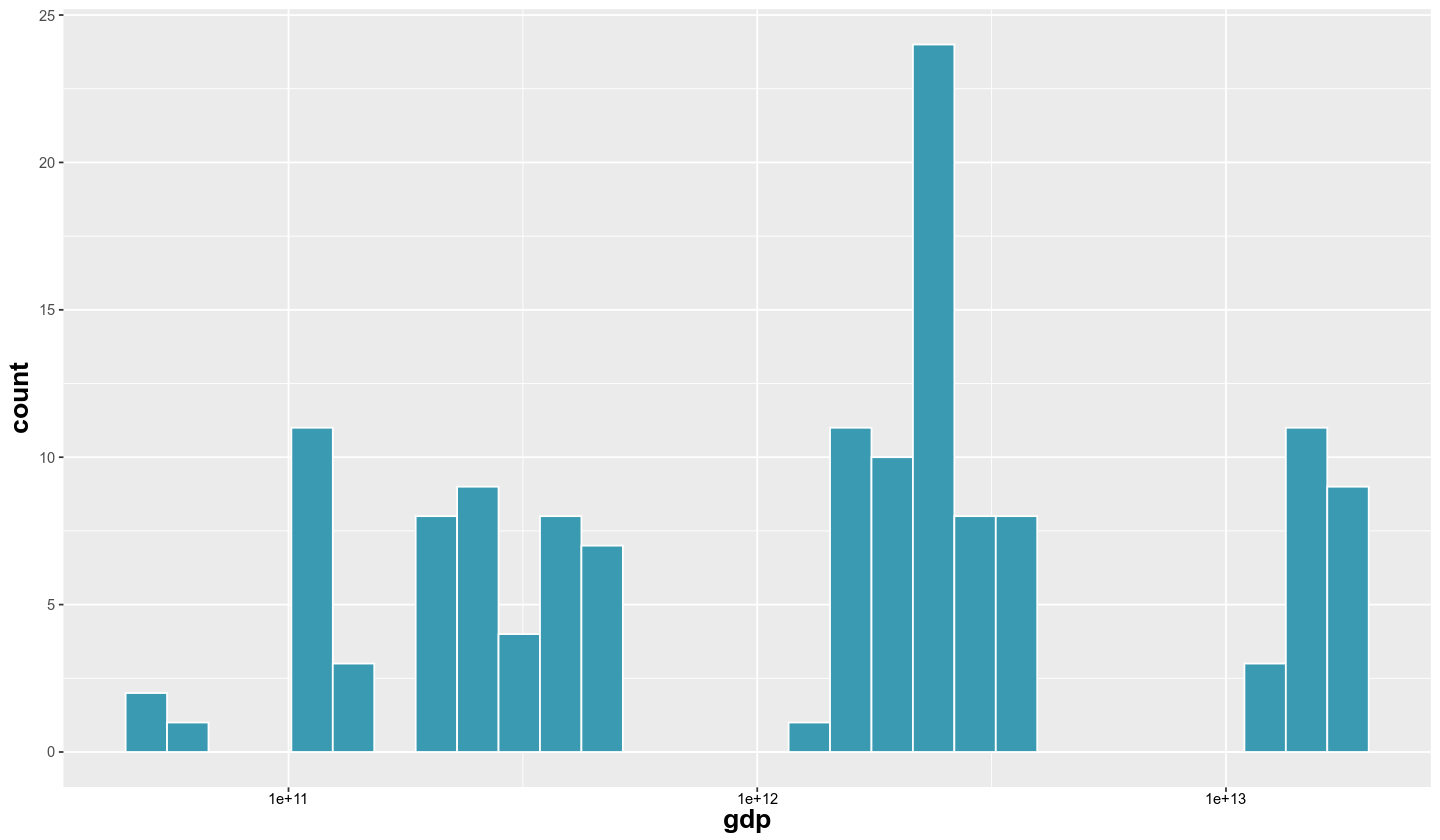

In [11]:
ggplot(data=df, aes(x = gdp) ) +
    geom_histogram(color = "white") +
    scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


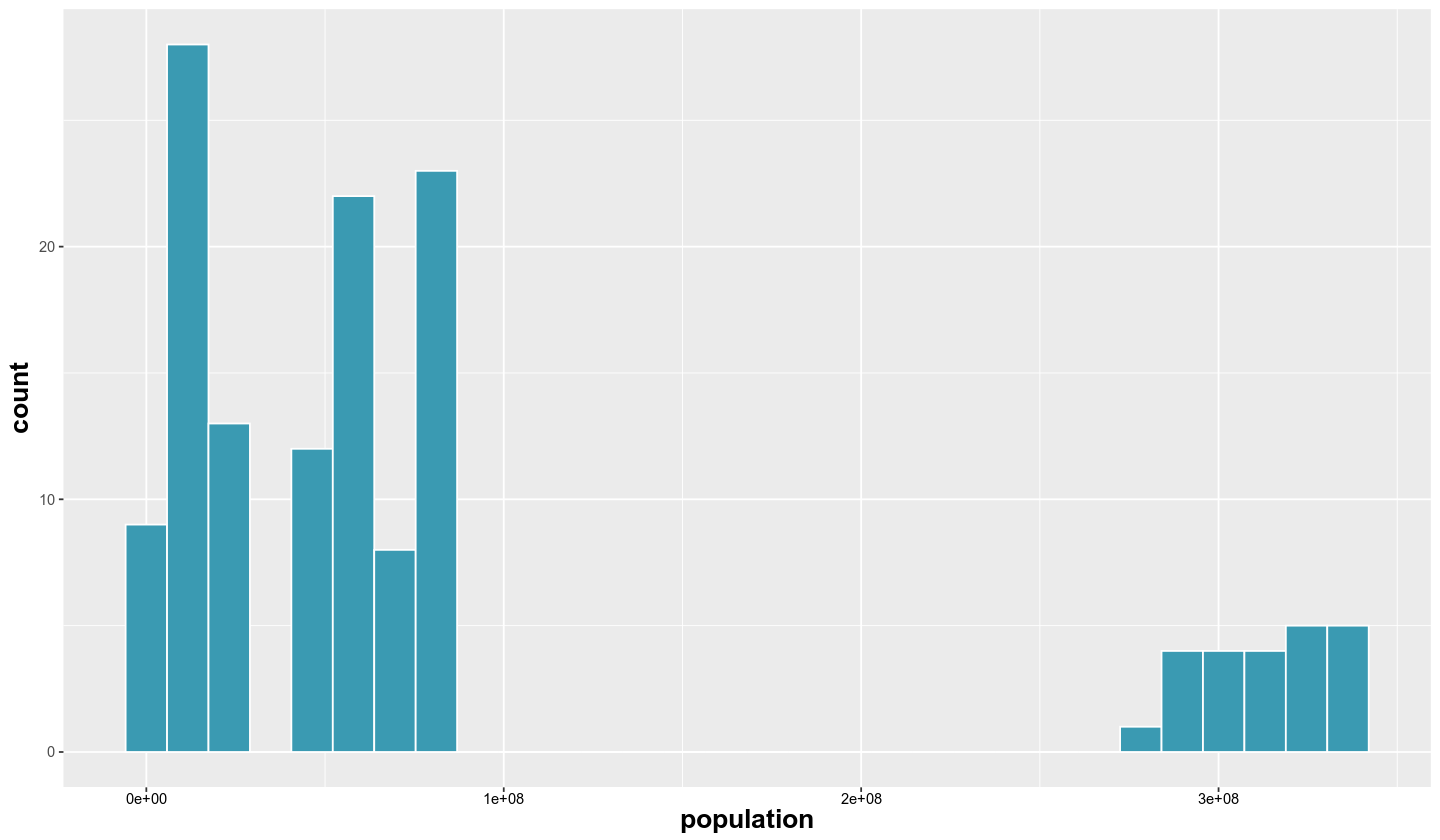

In [12]:

ggplot(df, aes(x = population)) +
 geom_histogram()

### Distirbution of changes in renewable energy and fossil fuels

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


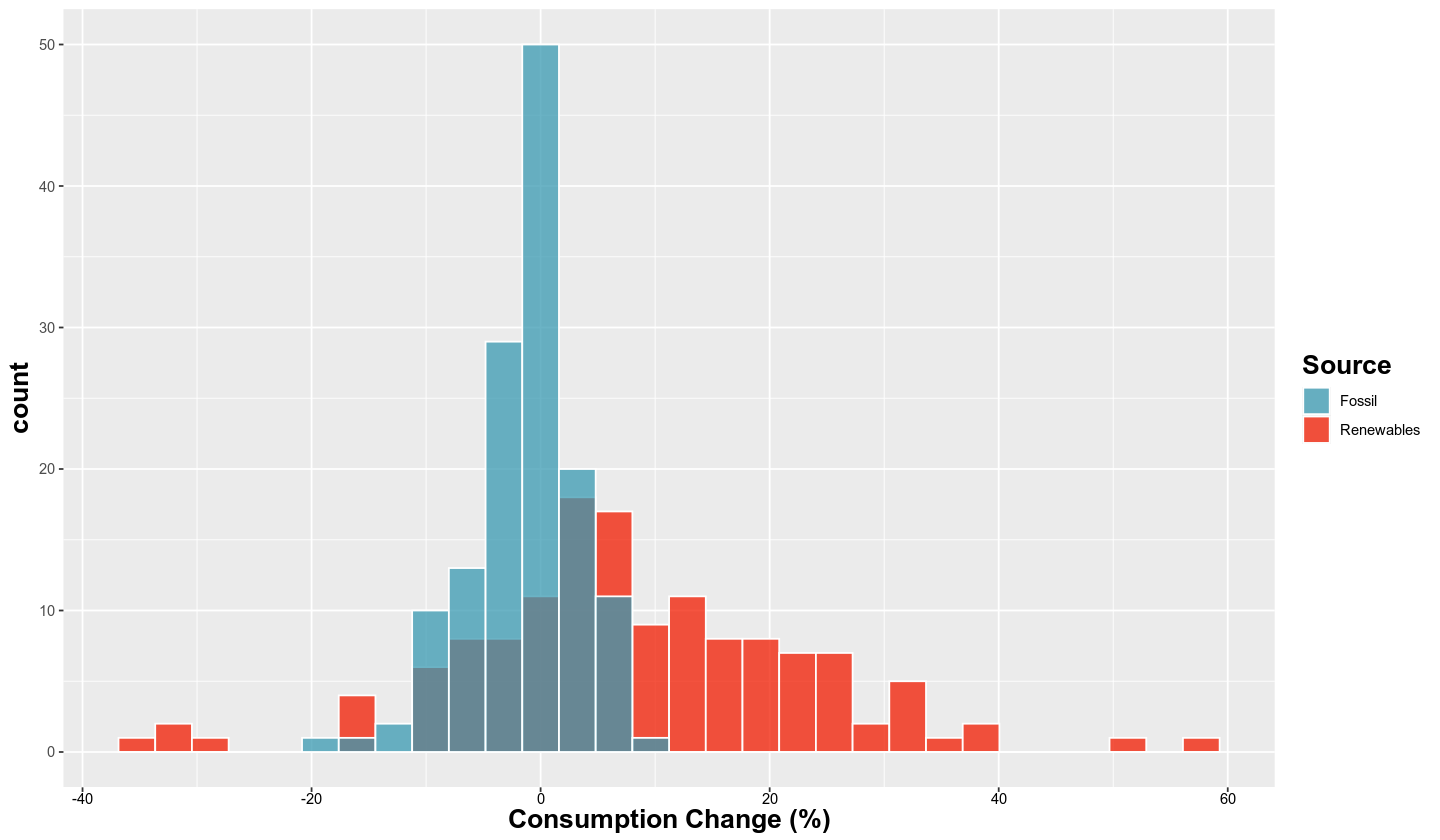

In [13]:

pal <- wes_palette("Zissou1", 2, type = "continuous")

ggplot(df) +
  geom_histogram(aes(x = renewables_cons_change_pct, fill = "Renewables"), 
                 alpha = 0.75, position = "identity") +
  geom_histogram(aes(x = fossil_cons_change_pct, fill = "Fossil"), 
                 alpha = 0.75, position = "identity") +
  scale_fill_manual(values = pal) +
  labs(x = "Consumption Change (%)", fill = "Source") 

In [14]:
df_long <- df %>%
  pivot_longer(
    cols = ends_with("_consumption"),
    names_to = "resource",
    values_to = "consumption"
  ) %>%
  mutate(resource = gsub("_consumption", "", resource))




Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


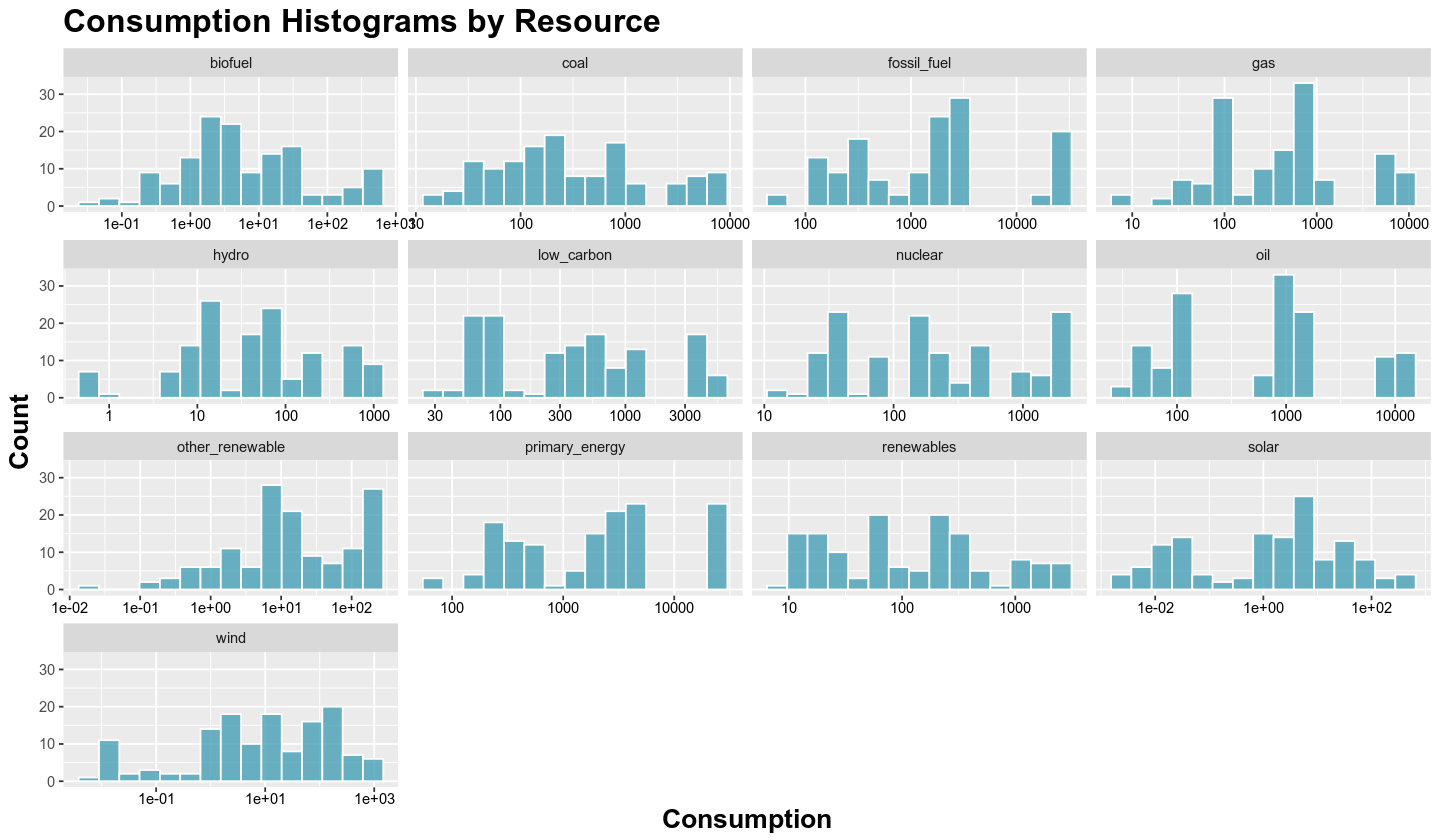

In [15]:
ggplot(df_long, aes(x = consumption)) +
  geom_histogram(fill = my_palette[1], color = "white", alpha = 0.75, bins=15) +
  facet_wrap(~ resource, scales = "free_x") + 
  scale_x_log10() +
  labs(x = "Consumption", y = "Count", title = "Consumption Histograms by Resource")
  

In [16]:
df_long <- df %>%
  pivot_longer(
    cols = ends_with("_consumption"),
    names_to = "resource",
    values_to = "consumption"
  ) %>%
  mutate(
    resource = gsub("_consumption", "", resource),
  ) %>%
  filter(resource %in% RESOURCES)

In [17]:
total_resources <- df_long %>%
  group_by(resource) %>% 
  summarize(total = sum(consumption)) 

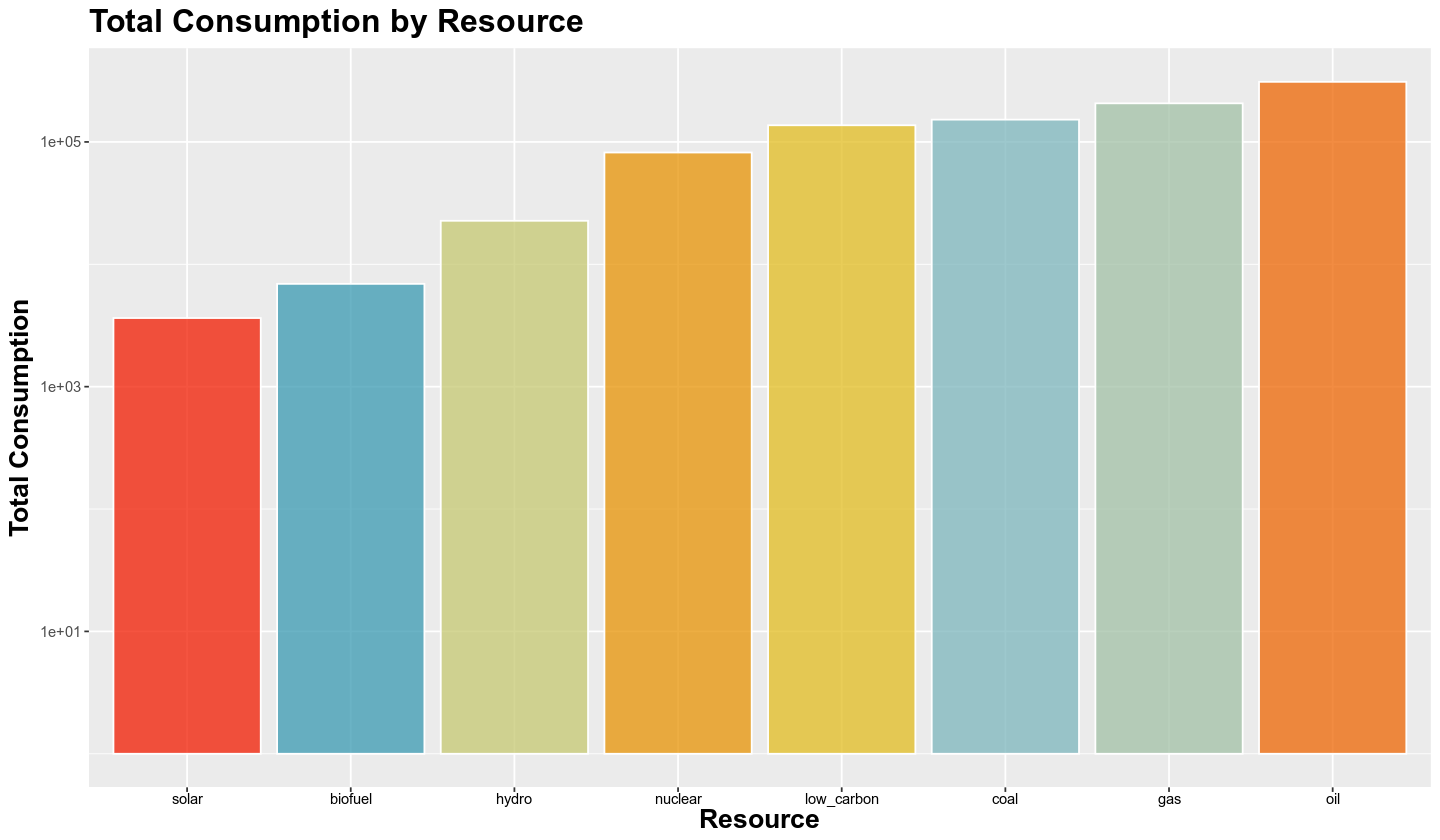

In [18]:
pal <- wes_palette("Zissou1", 8, type = "continuous")


ggplot(total_resources, aes(x = fct_reorder(resource, total), y = total, fill=resource)) +
  geom_col(alpha = 0.75, show.legend = FALSE) +
  scale_fill_manual(values = pal) +
  scale_y_log10() + 
  labs(x = "Resource", y = "Total Consumption", title = "Total Consumption by Resource")

## Bivariate

### Yearly Trends

Percentage of Consumption from each resource over the years

In [19]:
yearly_resource_percentages <- df_long %>%
  group_by(year, resource) %>%
  summarise(total_consumption = sum(consumption), .groups = 'drop') %>%
  group_by(year) %>%
  mutate(
    percentage_consumption = total_consumption / sum(total_consumption) * 100
  )


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


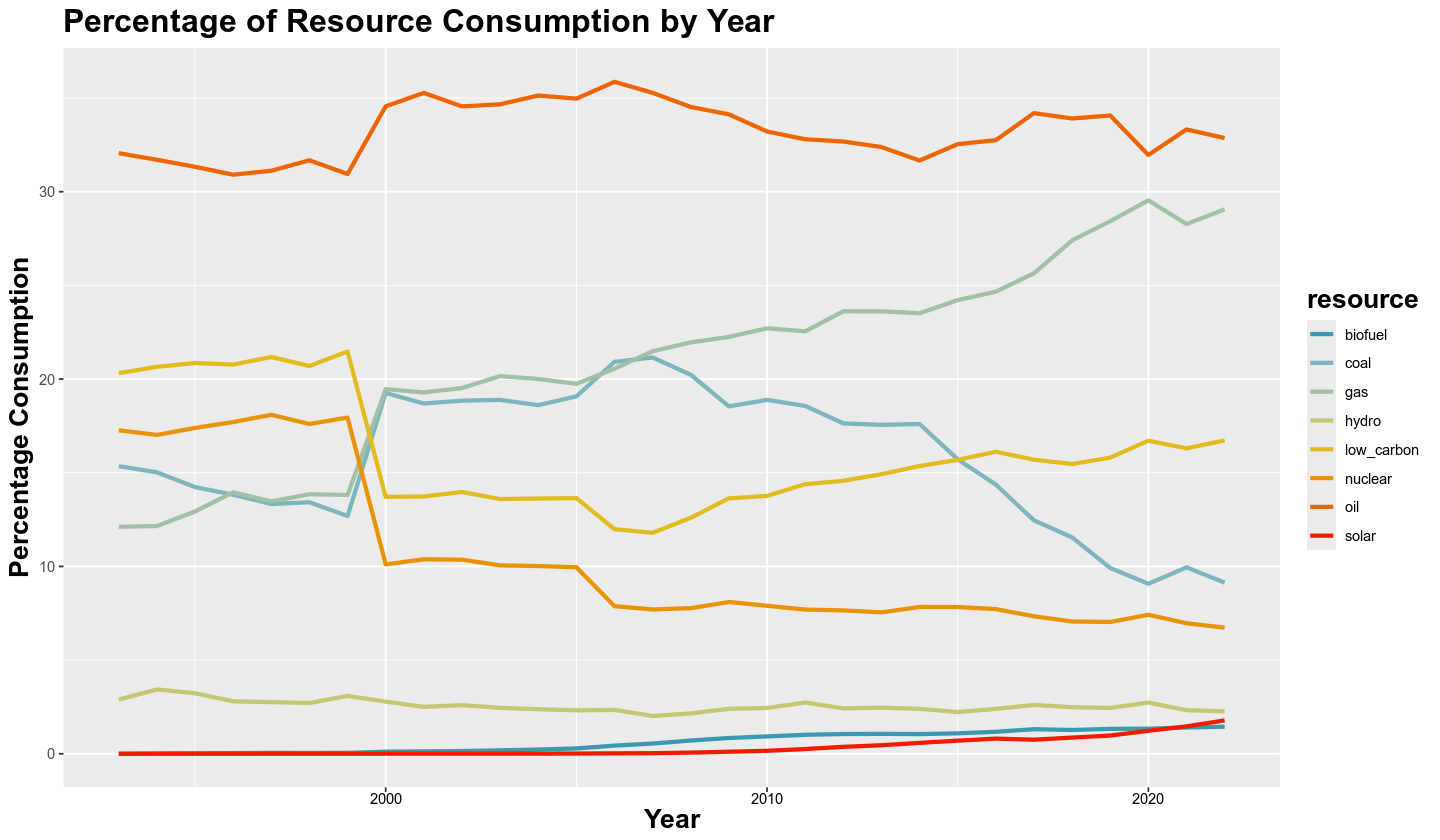

In [20]:
ggplot(yearly_resource_percentages, aes(x = year, y = percentage_consumption, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Resource Consumption by Year",
    x = "Year",
    y = "Percentage Consumption"
  )
    

Percentage of Electricity produced by Resource

In [21]:
yearly_elec_prod <- df %>% 
  subset(country == 'United States') %>%
  pivot_longer(
    cols = ends_with("_share_elec"),
    names_to = "resource",
    values_to = "share"
  ) %>%
  mutate(
    resource = gsub("_share_elec", "", resource),
  ) %>%
  filter(resource %in% RESOURCES) %>% 
  group_by(year, resource) %>%
  summarise(mean_share = mean(share), .groups = 'drop')


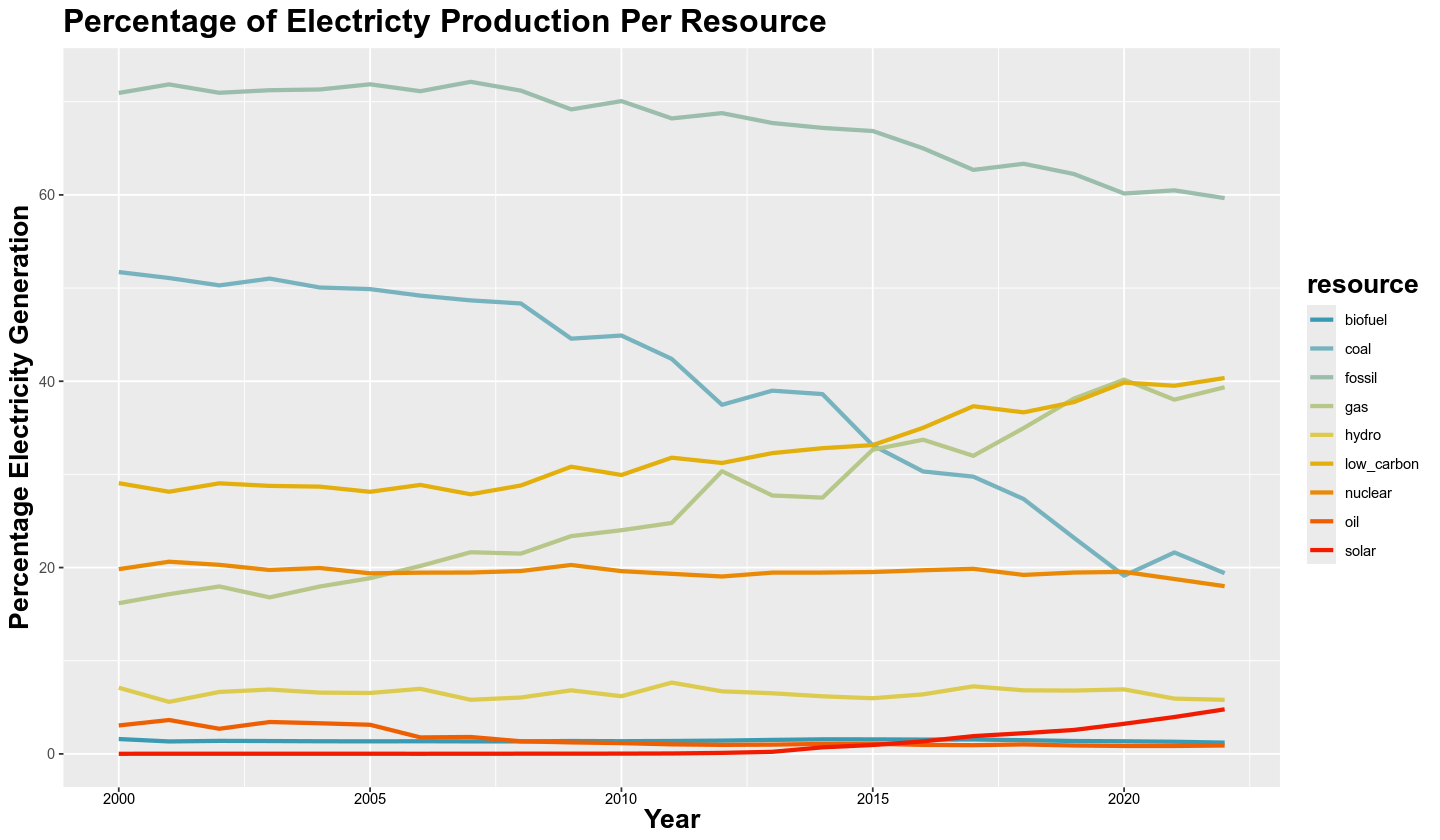

In [22]:
pal <- wes_palette("Zissou1", 9, type = "continuous")

ggplot(yearly_elec_prod, aes(x = year, y = mean_share, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Electricty Production Per Resource",
    x = "Year",
    y = "Percentage Electricity Generation"
  )
    

fossil fuel ratios over time

In [23]:
df$fossil_ratio <- df$fossil_fuel_consumption / df$renewables_consumption

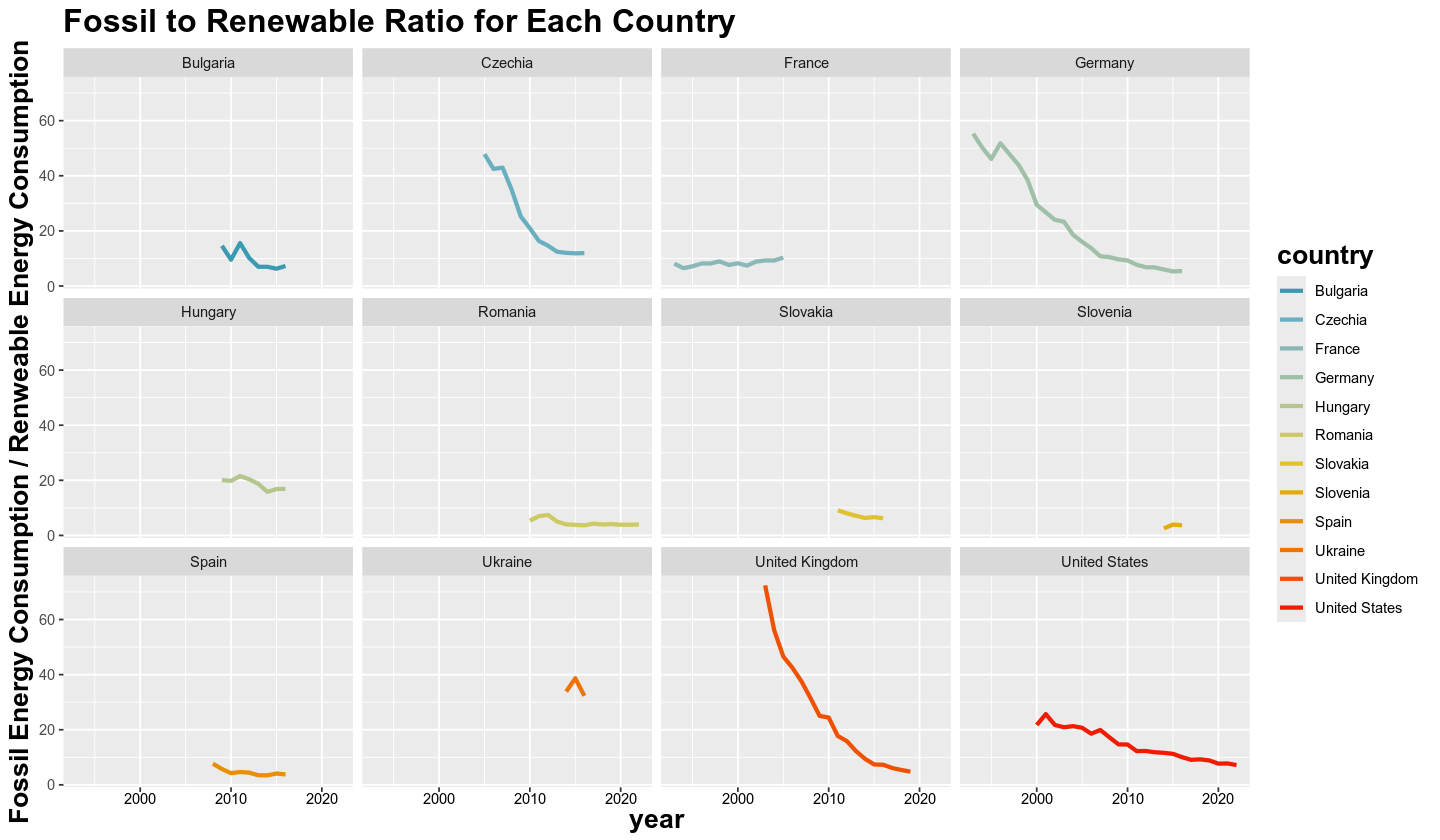

In [24]:
pal <- wes_palette("Zissou1", 12, type = "continuous")
ggplot(df, aes(x=year, y=fossil_ratio, color=country)) +
    geom_line(size=1.2) +
    scale_color_manual(values = pal) +
    facet_wrap(~country) +
    labs(title = "Fossil to Renewable Ratio for Each Country", y="Fossil Energy Consumption / Renweable Energy Consumption")

renewable energy percentages

In [25]:
RENEWABLE <- c("wind", "solar", "hydro", "other_renewables")

In [33]:
renewables <- df %>% 
  pivot_longer(
    cols = ends_with("_electricity"),
    names_to = "resource",
    values_to = "electricity"
  ) %>% 
  mutate(
    resource = gsub("_electricity", "", resource)
  ) %>% 
  filter(resource %in% RENEWABLE) %>% 
  group_by(year, resource) %>% 
  summarise(resource_electricity = sum(electricity), .groups = "drop") %>%
  group_by(year) %>% 
  mutate(
    total_renewable = sum(resource_electricity),
    percentage_of_total_renewables = resource_electricity / total_renewable
  )

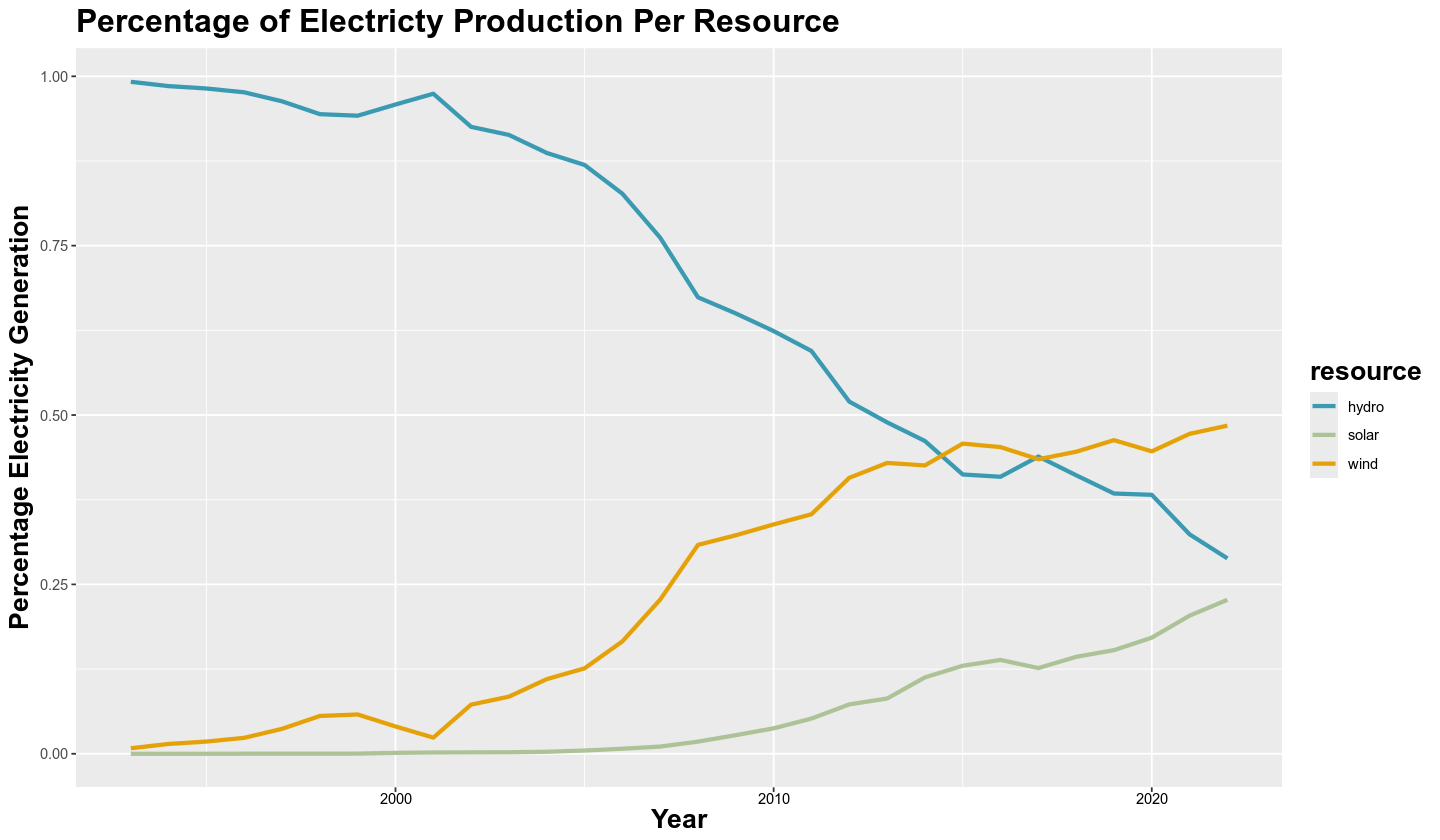

In [34]:
pal <- wes_palette("Zissou1", 4, type = "continuous")

ggplot(renewables, aes(x = year, y = percentage_of_total_renewables, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Electricty Production Per Resource",
    x = "Year",
    y = "Percentage Electricity Generation"
  )

Change PCT

In [ ]:
change_pct <- df %>% 
  pivot_longer(
    cols = ends_with("_cons_change_pct"),
    names_to = "resource",
    values_to = "change_pct"
  ) %>%
  mutate(
    resource = gsub("_cons_change_pct", "", resource),
  ) %>%
  filter(resource %in% RESOURCES) %>% 
  group_by(year, resource) %>%
  summarise(mean_pct_change = mean(change_pct), .groups = 'drop')

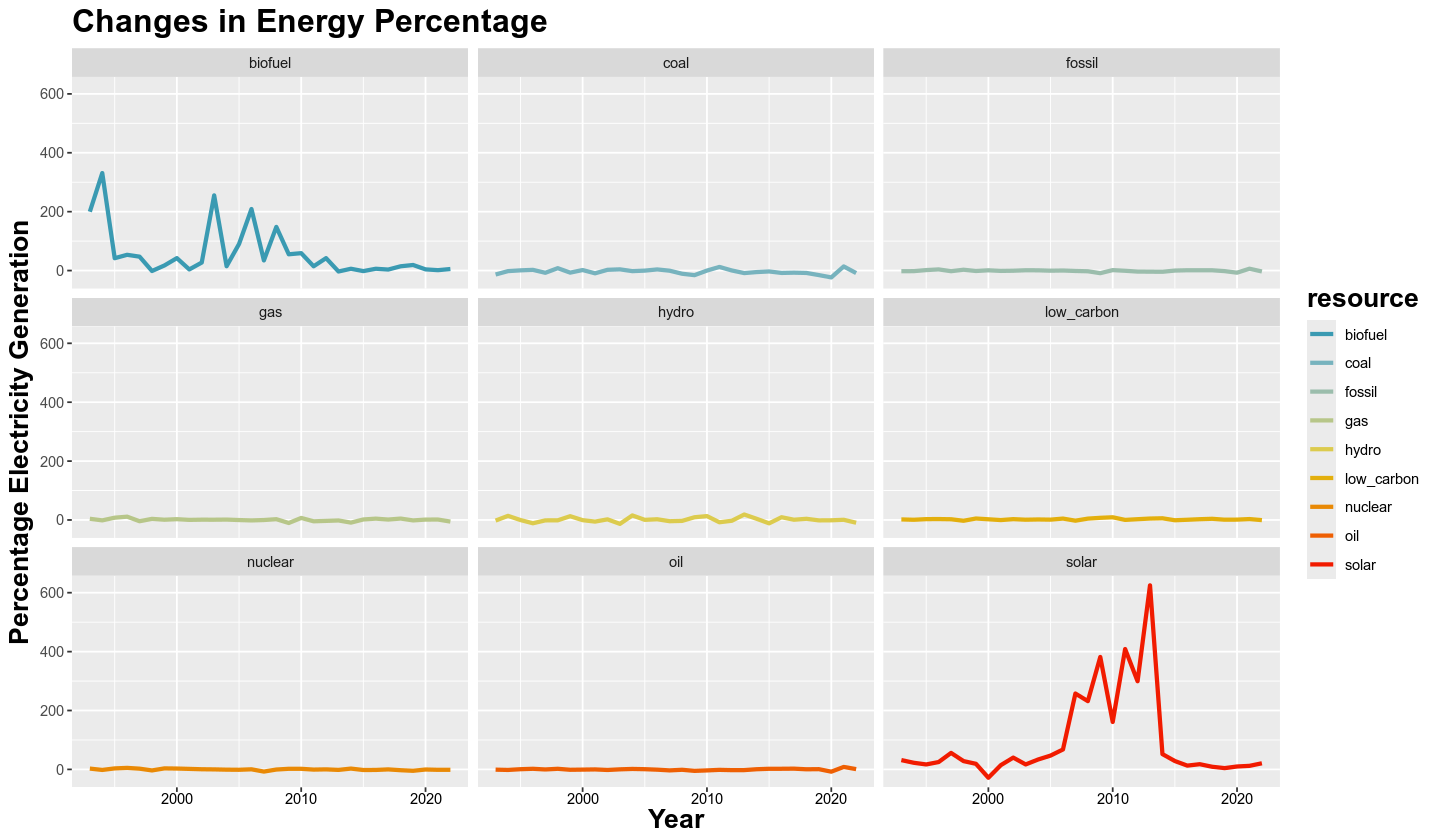

In [ ]:

pal <- wes_palette("Zissou1", 9, type = "continuous")

ggplot(change_pct, aes(x=year, y=mean_pct_change, groups = resource, color= resource)) +
  geom_line(size = 1.2) +
  facet_wrap(~resource) + 
  scale_color_manual(values = pal) +
  labs(
    title = "Changes in Energy Percentage",
    x = "Year",
    y = "Percentage Electricity Generation"
  )
    

### Relational Plots

In [ ]:
gdp_plot <- df %>% 
    subset(year == 2010)
    # mutate(gdp_trends = cut(gdp, ))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


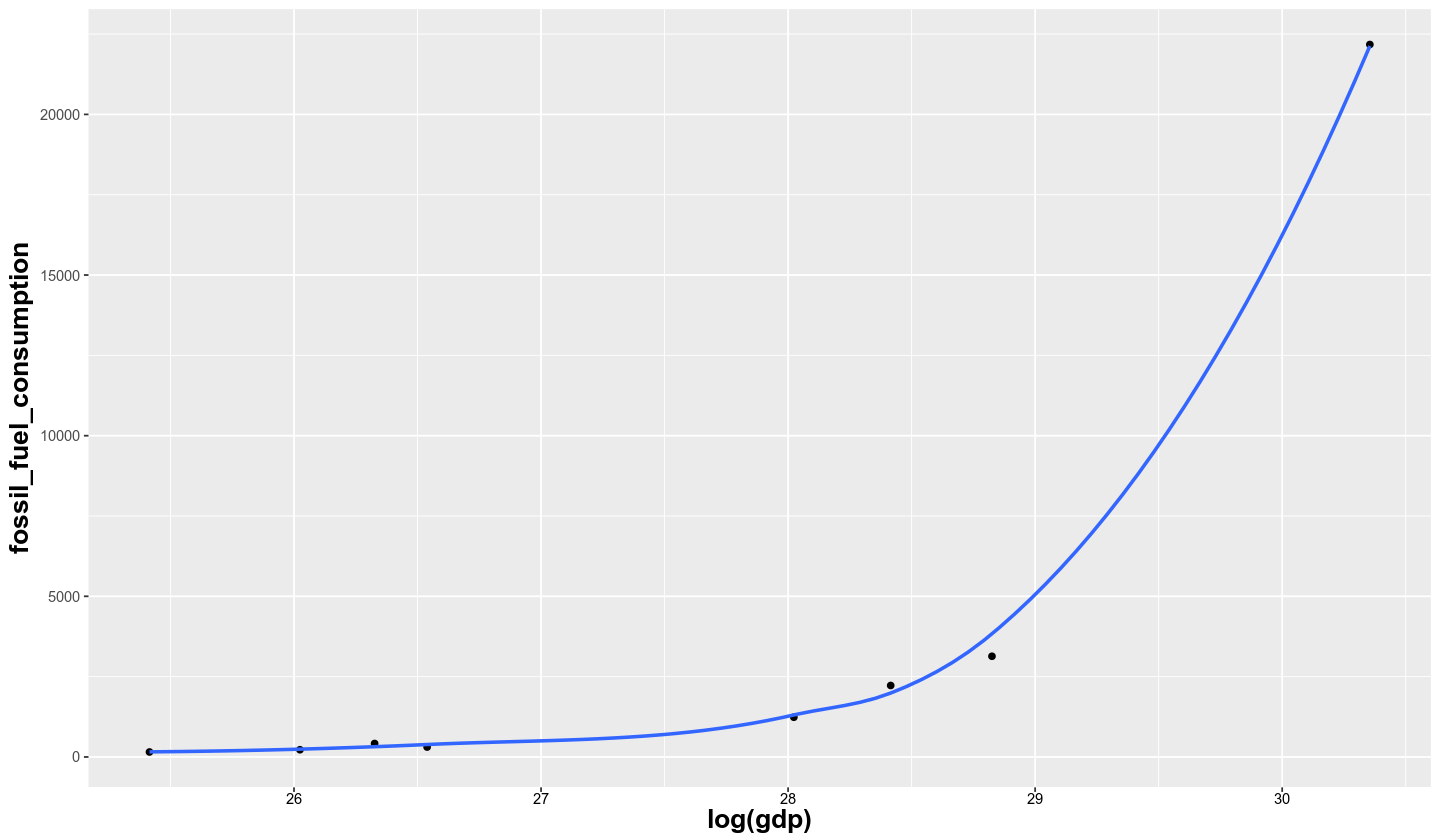

In [ ]:
ggplot(gdp_plot, aes(x = log(gdp), y = fossil_fuel_consumption)) +
    geom_point() +
    geom_smooth(se = FALSE) 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


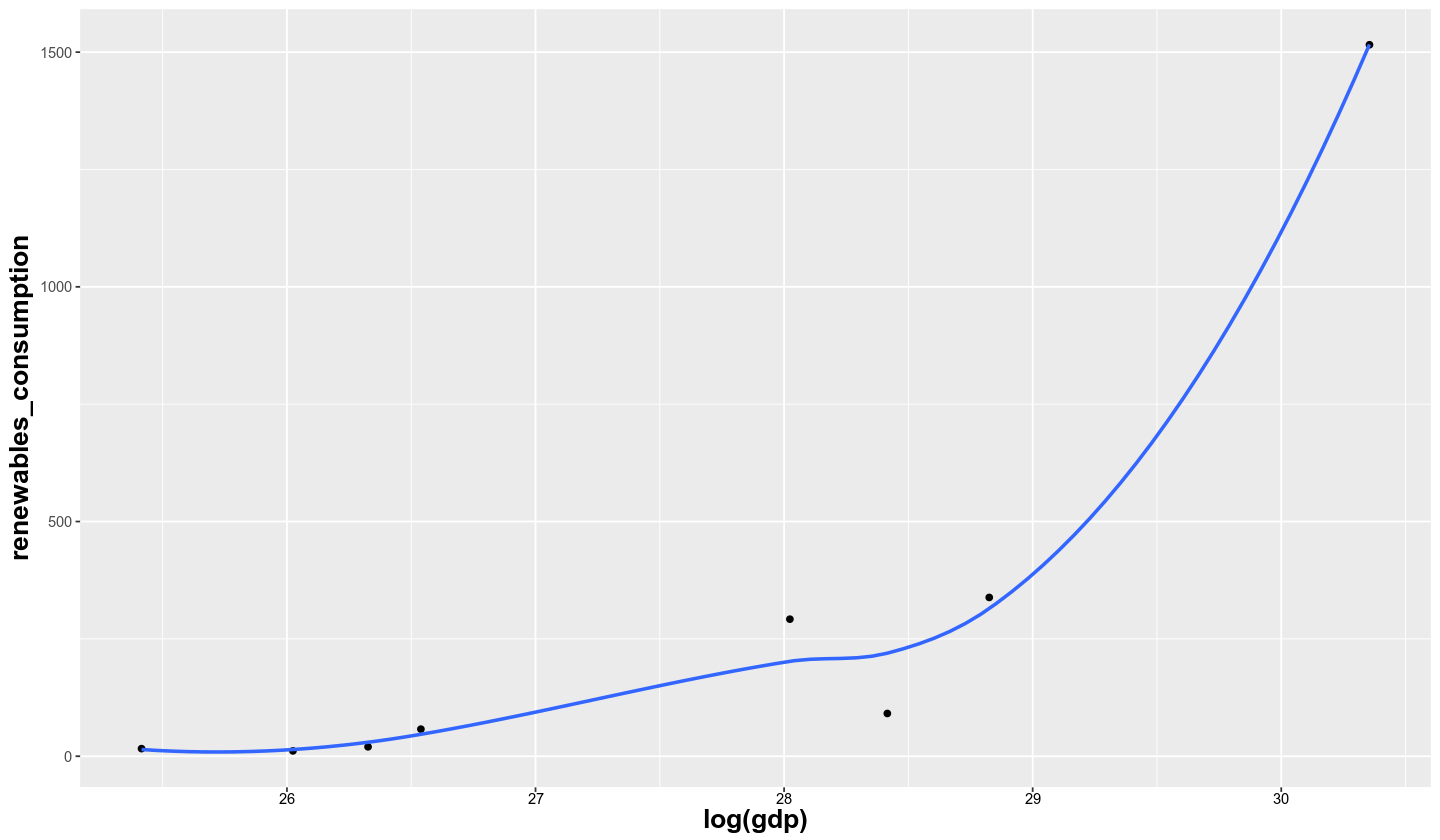

In [ ]:
ggplot(gdp_plot, aes(x = log(gdp), y = renewables_consumption)) +
    geom_point() +
    geom_smooth(se = FALSE) 

## Hyper Variate